# Chapter 2. Statistical Learning

## Exercise 9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.1f}'.format
import seaborn as sns
%matplotlib inline

In [2]:
filename = '../data/auto.csv'
auto_df = pd.read_csv(filename, na_values='?')
auto_df.dropna(inplace=True)

In [3]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [5]:
auto_df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
name            301
dtype: int64

In [6]:
len([f for f, g in auto_df.groupby(auto_df['name']) if len(g) > 1])

56

In [7]:
print([f for f, g in auto_df.groupby(auto_df['name']) if len(g) > 1])

['amc concord', 'amc gremlin', 'amc hornet', 'amc matador', 'amc matador (sw)', 'audi 100ls', 'buick century', 'buick estate wagon (sw)', 'buick skylark', 'chevrolet caprice classic', 'chevrolet chevelle malibu', 'chevrolet chevelle malibu classic', 'chevrolet chevette', 'chevrolet citation', 'chevrolet impala', 'chevrolet malibu', 'chevrolet monte carlo landau', 'chevrolet nova', 'chevrolet vega', 'datsun 210', 'datsun 710', 'datsun pl510', 'dodge aspen', 'dodge colt', 'fiat 128', 'ford country squire (sw)', 'ford galaxie 500', 'ford gran torino', 'ford gran torino (sw)', 'ford ltd', 'ford maverick', 'ford pinto', 'honda accord', 'honda civic', 'honda civic cvcc', 'mazda 626', 'oldsmobile cutlass salon brougham', 'opel 1900', 'opel manta', 'peugeot 504', 'plymouth duster', 'plymouth fury iii', 'plymouth reliant', 'plymouth valiant', 'pontiac catalina', 'pontiac phoenix', 'saab 99le', 'subaru', 'subaru dl', 'toyota corolla', 'toyota corolla 1200', 'toyota corona', 'toyota mark ii', 'vo

In [8]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0
mean,23.4,5.5,194.4,104.5,"2,977.6",15.5,76.0,1.6
std,7.8,1.7,104.6,38.5,849.4,2.8,3.7,0.8
min,9.0,3.0,68.0,46.0,"1,613.0",8.0,70.0,1.0
25%,17.0,4.0,105.0,75.0,"2,225.2",13.8,73.0,1.0
50%,22.8,4.0,151.0,93.5,"2,803.5",15.5,76.0,1.0
75%,29.0,8.0,275.8,126.0,"3,614.8",17.0,79.0,2.0
max,46.6,8.0,455.0,230.0,"5,140.0",24.8,82.0,3.0


In [9]:
for name in auto_df.columns:
    print(f"{name.title():s}: Min: {auto_df[name].min():} - Max: {auto_df[name].max():}")

Mpg: Min: 9.0 - Max: 46.6
Cylinders: Min: 3 - Max: 8
Displacement: Min: 68.0 - Max: 455.0
Horsepower: Min: 46.0 - Max: 230.0
Weight: Min: 1613 - Max: 5140
Acceleration: Min: 8.0 - Max: 24.8
Year: Min: 70 - Max: 82
Origin: Min: 1 - Max: 3
Name: Min: amc ambassador brougham - Max: vw rabbit custom


In [10]:
for name in auto_df.columns[:-1]:
    perc_err = 100*auto_df[name].sem()/auto_df[name].mean()
    print(f"{name.title():s}: {auto_df[name].mean():.2f} +/- {auto_df[name].sem():.2f} ({perc_err:.2f}%)")

Mpg: 23.45 +/- 0.39 (1.68%)
Cylinders: 5.47 +/- 0.09 (1.57%)
Displacement: 194.41 +/- 5.29 (2.72%)
Horsepower: 104.47 +/- 1.94 (1.86%)
Weight: 2977.58 +/- 42.90 (1.44%)
Acceleration: 15.54 +/- 0.14 (0.90%)
Year: 75.98 +/- 0.19 (0.24%)
Origin: 1.58 +/- 0.04 (2.58%)


In [11]:
auto_df_10_86 = auto_df.drop(index=auto_df.index[range(10, 86)])

In [12]:
auto_df_10_86.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           316 non-null    float64
 1   cylinders     316 non-null    int64  
 2   displacement  316 non-null    float64
 3   horsepower    316 non-null    float64
 4   weight        316 non-null    int64  
 5   acceleration  316 non-null    float64
 6   year          316 non-null    int64  
 7   origin        316 non-null    int64  
 8   name          316 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 24.7+ KB


In [13]:
auto_df_10_86.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0
mean,24.4,5.4,187.5,100.8,"2,936.5",15.7,77.1,1.6
std,7.9,1.7,100.1,36.0,811.9,2.7,3.1,0.8
min,11.0,3.0,68.0,46.0,"1,649.0",8.5,70.0,1.0
25%,18.0,4.0,100.2,75.0,"2,213.8",14.0,75.0,1.0
50%,23.9,4.0,145.5,90.0,"2,792.5",15.5,77.0,1.0
75%,30.6,6.0,250.0,115.0,"3,508.0",17.3,80.0,2.0
max,46.6,8.0,455.0,230.0,"4,997.0",24.8,82.0,3.0


In [14]:
df = auto_df_10_86
for name in df.columns[:-1]:
    print(f"{name.title():s}: {df[name].mean():.2f} +/- {df[name].sem():.2f}")

Mpg: 24.41 +/- 0.44
Cylinders: 5.37 +/- 0.09
Displacement: 187.51 +/- 5.63
Horsepower: 100.85 +/- 2.02
Weight: 2936.53 +/- 45.67
Acceleration: 15.72 +/- 0.15
Year: 77.14 +/- 0.18
Origin: 1.60 +/- 0.05


In [15]:
df = auto_df
for name in df.columns[:-1]:
    perc_err = 100*df[name].sem()/df[name].mean()
    print(f"{name.title():s}: {df[name].mean():.2f} +/- {df[name].sem():.2f}, ({perc_err:.2f}%)")

Mpg: 23.45 +/- 0.39, (1.68%)
Cylinders: 5.47 +/- 0.09, (1.57%)
Displacement: 194.41 +/- 5.29, (2.72%)
Horsepower: 104.47 +/- 1.94, (1.86%)
Weight: 2977.58 +/- 42.90, (1.44%)
Acceleration: 15.54 +/- 0.14, (0.90%)
Year: 75.98 +/- 0.19, (0.24%)
Origin: 1.58 +/- 0.04, (2.58%)


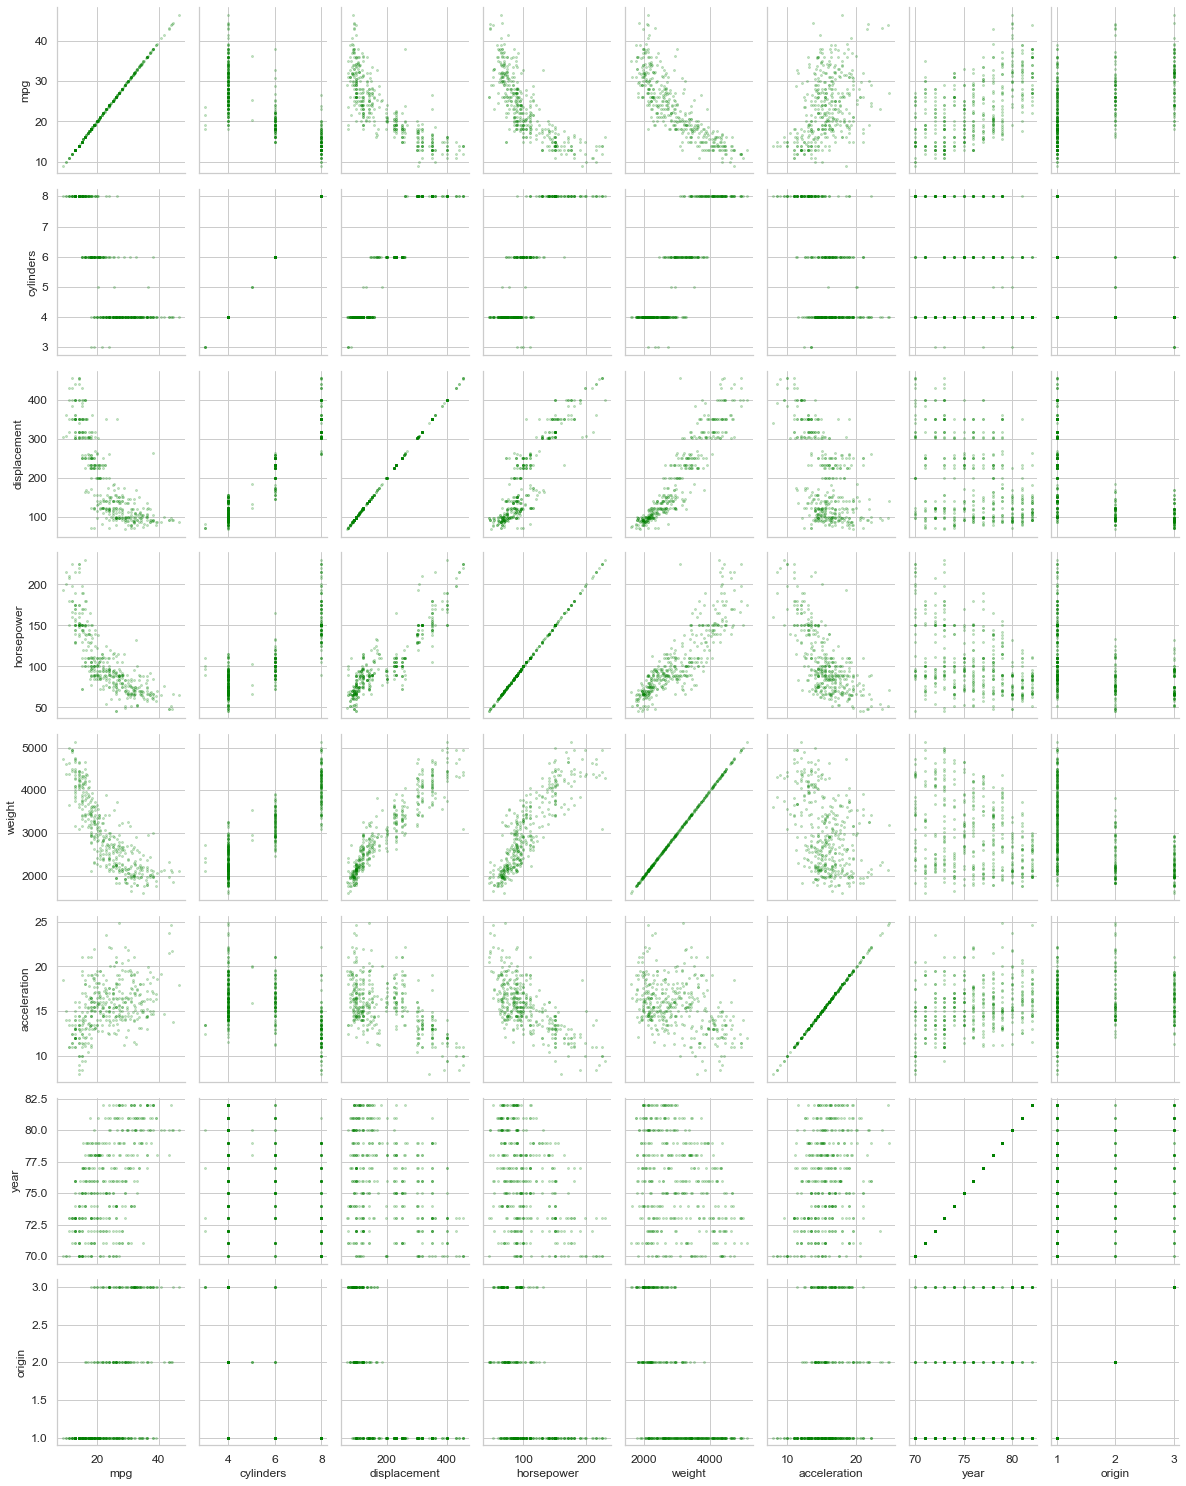

In [16]:
sns.set(style="whitegrid", color_codes=True)
df = auto_df
g = sns.PairGrid(df.iloc[:, 0:10], height=2.6, aspect=0.8)
g = g.map(plt.scatter, s=4, color='green', alpha=0.2)
xlabels, ylabels = [], []
label_font_size = 12

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j, i].xaxis.set_label_text(xlabels[i])
        g.axes[j, i].xaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='x', which='major', labelsize=label_font_size)
        g.axes[j, i].yaxis.set_label_text(ylabels[j])
        g.axes[j, i].yaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='y', which='major', labelsize=label_font_size)

plt.tight_layout();